# Práctica 2 (notebook)

## Trabajo con redes reales y medidas de centralidad

En esta práctica se desarrolla lo siguiente:
- Importar y procesar datos de redes reales para su análisis con NetworkX, tanto en Google Colab como en Jupyter (o código de python en general).
- Analizar las propiedades de los nodos vistas en el bloque teórico "Medidas de centralidad de los nodos"
- Visualizar redes pequeñas-medianas a partir de las propiedades de los nodos.
- Visualizar redes y sus propiedades generales con el programa Gephi

## Importar y procesar archivos
Para importar y procesar datos de una red (sea que ustedes generaron o que descargaron de algún repositorio) vamos a utilizar una paquetería especializada en análisis de datos llamada Pandas (https://pandas.pydata.org/) que ya viene instalada tanto en Colab como en Anaconda. 
Si trabajas en Colab, es necesario instalar otra paquetería que permite cargar y descargar archivos a tu computadora virtual de Google; google.colab.files. Si trabajas en tu compu, en un script the python o un notebook de Jupyter, esto no hace falta.

Los pasos a seguir para esta primera parte de la práctica son los siguientes:
1. Descarga los datos de una red de alguno de los repositorios que les proporcionamos (https://github.com/Curso-Redes-F-Ciencias-UNAM/recursos/blob/main/repositorios-redes.md). Si el archivo viene comprimido, debes extraer e identificar e identificar el archivo con los datos.
2. Si trabajas en Jupyter, guarda el archivo de datos en la carpeta de trabajo. Para ello primero te recomendamos trabajar en JupyterLab, que incluye un navegador de archivos, para identificar la carpeta de trabajo.
3. Si trabajas en Colab, simplemente identifica el lugar donde está el archivo, probablemente en tu carpeta de descargas o donde lo hayas guardado, ya que deberas buscarlo en una ventana emergente.

Hecho esto, ya puedes importar las paqueterías para empezar a trabajar. Como apoyo, a continuación está un video para esta primera parte:

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# solo para colab
from google.colab import files

Sólo para quienes trabajan en Colab: la siguiente celda utiliza la función upload, que abre una ventana emergente en la que debes seleccionar el archivo con los datos.

In [ ]:
files.upload()

Saving ca-netscience.mtx to ca-netscience.mtx


{'ca-netscience.mtx': b'%MatrixMarket matrix coordinate pattern symmetric \n% 379 379 914\n2 1\n3 1\n4 1\n5 1\n16 1\n44 1\n113 1\n131 1\n250 1\n259 1\n3 2\n5 4\n13 4\n14 4\n15 4\n16 4\n44 4\n45 4\n46 4\n47 4\n61 4\n126 4\n127 4\n128 4\n146 4\n152 4\n153 4\n154 4\n164 4\n165 4\n166 4\n176 4\n177 4\n249 4\n250 4\n274 4\n313 4\n314 4\n323 4\n324 4\n330 4\n371 4\n373 4\n374 4\n15 5\n16 5\n44 5\n45 5\n46 5\n47 5\n176 5\n177 5\n199 5\n201 5\n202 5\n204 5\n231 5\n235 5\n236 5\n237 5\n238 5\n249 5\n250 5\n254 5\n298 5\n313 5\n314 5\n373 5\n374 5\n7 6\n8 6\n8 7\n190 7\n191 7\n192 7\n193 7\n26 8\n62 8\n63 8\n64 8\n65 8\n137 8\n189 8\n342 8\n343 8\n344 8\n10 9\n11 9\n12 9\n11 10\n12 10\n67 10\n68 10\n69 10\n12 11\n14 13\n15 13\n16 13\n17 13\n18 13\n19 13\n20 13\n274 13\n15 14\n16 14\n16 15\n45 15\n46 15\n47 15\n176 15\n177 15\n278 15\n279 15\n334 15\n366 15\n367 15\n368 15\n45 16\n46 16\n47 16\n153 16\n154 16\n176 16\n177 16\n249 16\n250 16\n313 16\n314 16\n323 16\n324 16\n371 16\n373 16\n18 17\n

La salida de esa celda anterior te indicará la "ruta", en la computadora virtual, donde se encuentra tu archivo. Identifícala para poder generar una variable ```ruta```, que es una cadena con la ubicación del archivo.

Si estás trabajando en jupyter o un script, te recomendamos generar la misma variable ```ruta```, que es simplemente el nombre del archivo si lo guardaste en la carpeta de trabajo.

Posteriormente, en cualquiera de los casos, utilizaremos la función de  pandas ```read_csv()``` que sirve para abrir cualquier archivo de texto y generar una tabla con datos. Como siempre, te recomendamos ir a la documentación de la función para identificar los argumentos y lo que hacen, pero por lo pronto sólo usaremos los que se ven a continuación. En el primer video se explica lo importante del argumento ```nrows``` y cómo elegir los valores adecuados para ```skiprows```, ```header``` y ```sep```, que dependen de la estructura del arhcivo de datos.

In [ ]:
# se genera la cadena con la ruta del archivo. OJO: debes colocar el nombre del archivo que tú hayas descargado

ruta = 'ca-netscience.mtx' 

#se abre el archivo y la tabla, un objeto tipo DataFrame de pandas, se guarda en la variable datos
datos = pd.read_csv(ruta,
            nrows = 10,
            skiprows = 2,
            header = None,
            sep = ' ')
#se muestra la tabla
datos

,0,1
0,2,1
1,3,1
2,4,1
3,5,1
4,16,1
...,...,...
909,374,373
910,376,375
911,377,375
912,377,376


Para generar la red hay dos opciones, una que coincide con como lo hicimos en la práctica 1 haciendo la lista de enlaces y agregando a un objeto tipo ```Graph()```, y la otra es utilizando nuevas funciones.
### Opción 1
De la tabla, tomamos las primeras dos columnas, que son los nodos de cada enlace, y con la propiedad ```.values``` se obtiene un
arreglo de parejas de nodos que utilizaremos para agregar a un ```Graph()``` de networkx (ver práctica 1). Este arreglo se guarda 
en la variable ```enlaces```

In [ ]:
enlaces = datos[[0,1].values
enlaces

In [ ]:
G = nx.Graph()
G.add_edges_from(enlaces)

### Opción 2
La segunda opción es utilizar una función de networkx que directamente lee un DataFrame de pandas y lo convierte en una red. Tal función es ```from_pandas_edgelist()``` y lo único que hay que indicar es, además de la tabla, las columnas que interpretará como los nodos de origen (source) y destino (target) de cada enlace. En este caso las columnas son 0 y 1:

In [ ]:
G = nx.from_pandas_edgelist(datos, source = 0, target = 1)

En cualquiera de las dos opciones, ya tenemos la red ```G``` y podemos visualizarla tal y como se hizo en la práctica 1. En la siguiente celda se usan algunos argumentos de la función draw, para que exploren, sin embargo se recomienda ver todos los argumentos directamente en la documentación: https://networkx.org/documentation/networkx-1.7/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

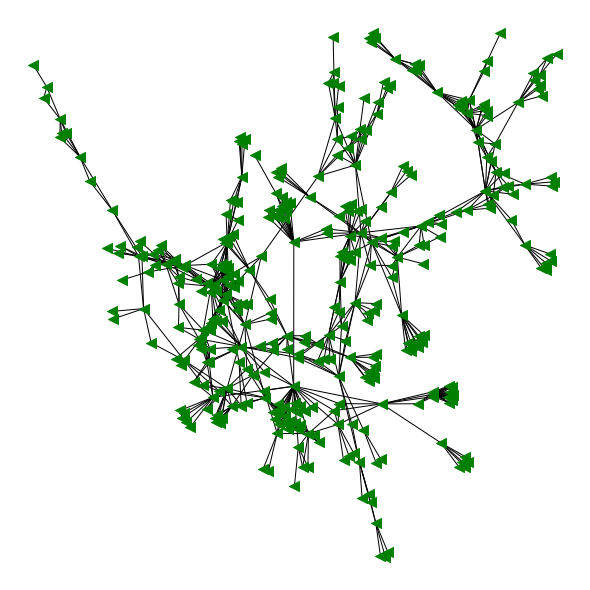

In [ ]:
plt.figure( figsize = [8,8] )
nx.draw(G,
        node_size = 100, #probar distintos valores: 50, 100, 200
        node_color = 'g', #probar distintos colores:'g', 'y', 'b', 'r', 'k'
        node_shape = '<') #probar distintos marcadores: 'o', 's', '8', '^'

Igualmente, la matriz de adyacencia (como se hizo en la práctica 1) ya nos da algo de información sobre la estructura de la red. Notar que, como dice Barabasi, la mayoría de las redes son "ralas" (sparse), esto es, tienen muy pocos enlaces en comparación con el número de nodos.

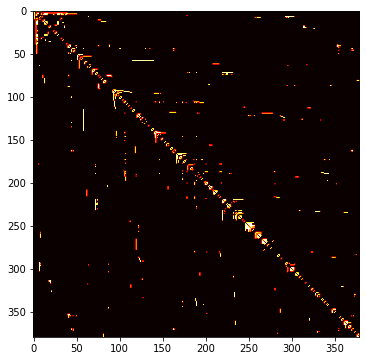

In [ ]:
plt.figure(figsize = [6,6])

A = nx.to_numpy_array(G)
plt.imshow(A, 'hot')

## Centralidad de los nodos
Networkx tiene disponibles todas las centralidades vistas en la parte teórica, y muchas más (ver la [documentación](https://networkx.org/documentation/stable/reference/algorithms/centrality.html)). Algunos ejemplos se muestran en la siguiente celda:

In [ ]:
nx.closeness_centrality(G)
#nx.betweenness_centrality(G)
#nx.degree_centrality(G)
#nx.pagerank(G)

{1: 0.21176470588235294,
 2: 0.17491901897269782,
 3: 0.17491901897269782,
 4: 0.21331828442437922,
 5: 0.22964763061968407,
 6: 0.17838603114676735,
 7: 0.17872340425531916,
 8: 0.21637092157985116,
 9: 0.13705583756345177,
 10: 0.15862358371800253,
 11: 0.13705583756345177,
 12: 0.13705583756345177,
 13: 0.18155619596541786,
 14: 0.17889256980596308,
 15: 0.19434447300771207,
 16: 0.1969775924960917,
 17: 0.16875,
 18: 0.1686746987951807,
 19: 0.15390879478827363,
 20: 0.15384615384615385,
 21: 0.21307779030439683,
 22: 0.18947368421052632,
 23: 0.2141643059490085,
 24: 0.21247892074198987,
 25: 0.20454545454545456,
 26: 0.25661914460285135,
 27: 0.20454545454545456,
 28: 0.20454545454545456,
 29: 0.14444019870080244,
 30: 0.20138518913159298,
 31: 0.17516218721038,
 32: 0.20203099946552647,
 33: 0.18834080717488788,
 34: 0.17516218721038,
 35: 0.17524339360222532,
 36: 0.17516218721038,
 37: 0.0926697720029419,
 38: 0.10210696920583469,
 39: 0.17135086128739802,
 40: 0.2066703116457

Como puedes ver, estas funciones nos regresan los valores de la centralidad en un diccionario que, a cada nodo (identificado por un número), le asocia un valor. Esto permite obtener el valor específico de la centralidad de un nodo específico mediante corchetes, aunque eso no suele ser muy útil:

In [ ]:
nx.closeness_centrality(G)[5] #ejemplo, centralidad de cercanía del nodo 5

0.22964763061968407

A continuación se describe, paso por paso, cómo convertir esos diccionarios en elementos del gráfico (color y tamaño). Para ello, pueden volver a revisar la [documentación](https://networkx.org/documentation/networkx-1.7/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) de las funciones draw, de networkx, y ver qué tipo de variables reciben los argumentos ```node_size``` y ```node_color```; reciben "scalar or array" y "color string, or array of floats", respectivamente. Esto quiere decir que puedes asignar un tamaño (scalar) o un color (string) para que se aplique igual a todos los nodos, o puedes asignarles un arreglo que le asocie un valor distinto a cada nodo. Obviamente, tal arreglo debe ser de una longitud igual al número de nodos de la red.

Lo que debemos hacer entonces es convertir los diccionarios en arreglos. Esto lo haremos con los siguientes pasos:
- guardar la centralidad en una variable ```diccionario```
- mediante la definición de listas por comprensión (comprehensive lists) haremos una lista con los valores de la centralidad, ordenados según el orden de los nodos.
- esa lista lo convertiremos en un arreglo de numpy mediante ```np.array()``` y lo nombraremos ```sizes``` o ```colors```, para meterlos como argumentos de ```draw```.

Antes, haremos un paréntesis para familizarnos con las listas por comprensión, una funcionalidad muy útil de python.
Hay dos formas de crear listas en python: por extensión (como hemos trabajado hasta ahora), definiendo elemento por elemento; y por comprensión, dando la regla que define a cada elemento. Esto es análogo a la definición de conjuntos por extensión y por comprensión. La estructura sería la siguiente:
- por extensión: ```[elem1, elem2, elem3, ...]```
- por comprensión: ```[f(i) for i in Conjunto]```

In [ ]:
[0, 1, 4, 9, 16, 25] # crea una lista por extensión: definimos manualmente cada elemento

[0, 1, 4, 9, 16, 25]

In [ ]:
[i**2 for i in range(6)] #por comprensión: los elementos son los cuadrados de los números del 0 al 5

[0, 1, 4, 9, 16, 25]

In [ ]:
[2*j-3 for j in range(6)] # por comprensión

[-3, -1, 1, 3, 5, 7]

Esta es la base para crear una lista, y luego un arreglo, a partir del diccionario, con la siguiente estructura:
- ```[diccionario[nodo] for nodo in G]```: el elemento de la lista es el valor del diccionario, para cada nodo, y barre todos los nodos de ```G``` en orden

In [ ]:
diccionario = nx.degree_centrality(G)

lista = [diccionario[i] for i in G]

sizes = np.array(lista)

Y a continuación se introduce el arreglo sizes como argumento de la función draw. OJO: como los valores de la centralidad son muy pequeños, multiplicamos el arreglo por 10000 para que los nodos se vean. Ese valor puede variar según la red, deben explorar distintos valores hasta encontrar una visualización que les satisfaga.

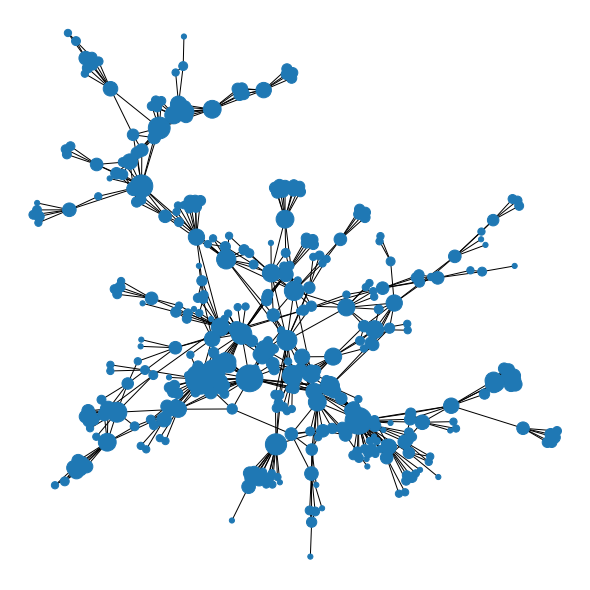

In [ ]:
plt.figure(figsize = [8,8] )

nx.draw(G,
        node_size = 10000*sizes) #jugar con el factor

Haremos lo mismo pero guardarndo los valores en la variable ```colors```, notar que nos brincamos un paso y metemos la lista directo como argumento en  ```np.array()```.

Finalmente, si nos decidimos por definir los colores de los nodos con un arreglo, podemos también determinar la paleta de color (```cmap```) con el que se trabajará. Para elegir una paleta, o mapeo, de colores, puede googlear "cmap python" y seguro encontrarán una página con los nombres posibles. Aquí usaremos "viridis"

In [ ]:
diccionario = nx.closeness_centrality(G)
colors = np.array([diccionario[i] for i in G])


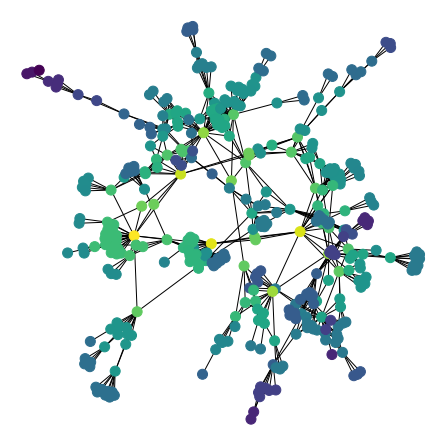

In [ ]:
plt.figure(figsize = [6,6])

nx.draw(G,
        node_size = 100,
        node_color = colors,
        cmap = 'viridis')

A continuación combinaremos ambas cosas. Asignaremos una centralidad al color y otra al tamaño.

Igualmente, les recomendamos explorar distintos diseños (layouts) para visualizar las redes. Algunos son más apropiados para ciertas redes. Para ello se pueden usar distintas funcines draw de networkx, algunas son:
- ```nx.draw()```
- ```nx.draw_circular()```
- ```nx.draw_spring()```
- ```nx.draw_kamada_kawai()```

Cada una tiene un algoritmo distinto. Se habla un poco de ello en los videos de esta lección.

Finalmente (sólo para colab), volvemos a utilizar una función de ```files```, en este caso ```files.download()```, para descargar la imagen generada a su compu. 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

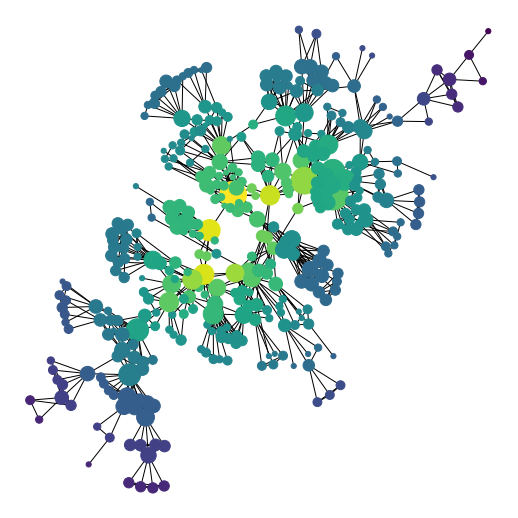

In [ ]:
plt.figure(figsize = [7,7] )

nx.draw_kamada_kawai(G,
        node_size = 10000*sizes,
        node_color = colors)
plt.savefig('imagen.png', dpi = 300)
files.download('imagen.png')

Un último ejercicio para explorar otra forma de analizar las propiedades de los nodos es visualizar las centralidades no ya como elementos de la gráfica de la red, sino una gráfica x-y donde la abcisa sea el nodo y la ordenada el valor de la centralidad. Esto permite visualizar varias (tantas como quieras) centralidades distintas y ver si están correlacionadas o si hay algún nodo que sea importante para más de una centralidad.

Para ello únicamente guardamos las centralidades en distintos arreglos, y los graficamos todos con la función ```plt.plot()```; se puede agregar etiquetas para incorporar a la gráfica. 

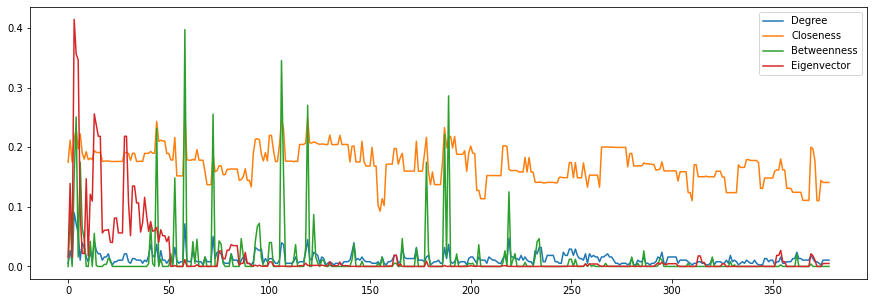

In [ ]:
diccionario = nx.degree_centrality(G)
d = np.array([diccionario[i] for i in G])

diccionario = nx.closeness_centrality(G)
c = np.array([diccionario[i] for i in G])

diccionario = nx.betweenness_centrality(G)
b = np.array([diccionario[i] for i in G])

diccionario = nx.eigenvector_centrality(G)
e = np.array([diccionario[i] for i in G])


plt.figure(figsize = [15, 5])
plt.plot(d, label = 'Degree')
plt.plot(c, label = 'Closeness')
plt.plot(b, label = 'Betweenness')
plt.plot(e, label = 'Eigenvector')

plt.legend()

Observación sobre betweenness

In [ ]:
G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([ (1,2), (1,3), (2,3), (2,4), (2,5), (3,5), (5,6) ])

nx.draw(G1, with_labels = True)



In [ ]:
nx.betweenness_centrality(G1, normalized= False, endpoints= True)